In [ ]:
from numpy import nan as NA
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
df = pd.DataFrame({
    'x1': np.random.normal(0, 2,  10000),
    'x2': np.random.normal(5, 3,  10000),
    'x3': np.random.normal(-5, 5, 10000)
})
df.plot.kde()

In [ ]:
from sklearn.preprocessing import *
standardscaler = StandardScaler()
data_tf = standardscaler.fit_transform(df)
# data_tf = StandardScaler().fit_transform(df)

df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])
df.plot.kde()

In [ ]:
data_tf = MinMaxScaler().fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])
df.plot.kde()

In [ ]:
data_tf = MaxAbsScaler().fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])
df.plot.kde()

In [ ]:
data_tf = RobustScaler().fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])
df.plot.kde()

In [ ]:
df = pd.DataFrame({  ## 왜도 첨도
    'x1': np.random.chisquare(8, 1000),    # positive skew
    'x2': np.random.beta(8, 2, 1000) * 40, # negative skew 
    'x3': np.random.normal(50, 3, 1000)    # no skew
})
df.plot.kde()

In [ ]:
data_tf = StandardScaler().fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])
df.plot.kde()

In [ ]:
data_tf = MinMaxScaler().fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])
df.plot.kde()

In [ ]:
data_tf = MaxAbsScaler().fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])
df.plot.kde()

In [ ]:
data_tf = RobustScaler().fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])
df.plot.kde()

In [ ]:
np.random.normal(1, 1, 25)  ##정규분포

In [ ]:
np.random.standard_t()

In [ ]:
np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)])

In [ ]:
df = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), 
                          np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), 
                          np.random.normal(50, 1, 25)]),
})
df.plot.kde()

In [ ]:
data_tf = StandardScaler().fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])
df.plot.kde()

data_tf = MinMaxScaler().fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])
df.plot.kde()

data_tf = MaxAbsScaler().fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])
df.plot.kde()

data_tf = RobustScaler().fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])
df.plot.kde()

In [1]:
## 정규 분포로 변환 : 분포도 그려보고 치우친 분포면 정규 분포로 변환

import pandas as pd
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
import seaborn as sns

##########데이터 로드
train_df = pd.DataFrame([
    [2, 1, 0, 3],    [3, 2, 0, 5],    [3, 4, 0, 7],    [5, 5, 0, 10],    [7, 5, 0, 12],    [2, 5, 0, 7],
    [8, 9, 1, 13],   [9, 10, 3, 13],  [6, 12, 0, 12]], columns=['hour', 'attendance', 'library', 'score'])
test_df = pd.DataFrame([
    [9, 2, 1, 13],    [6, 10, 0, 12],    [2, 4, 0, 6]], columns=['hour', 'attendance', 'library', 'score'])

print(train_df) 
print(test_df) 

   hour  attendance  library  score
0     2           1        0      3
1     3           2        0      5
2     3           4        0      7
3     5           5        0     10
4     7           5        0     12
5     2           5        0      7
6     8           9        1     13
7     9          10        3     13
8     6          12        0     12
   hour  attendance  library  score
0     9           2        1     13
1     6          10        0     12
2     2           4        0      6


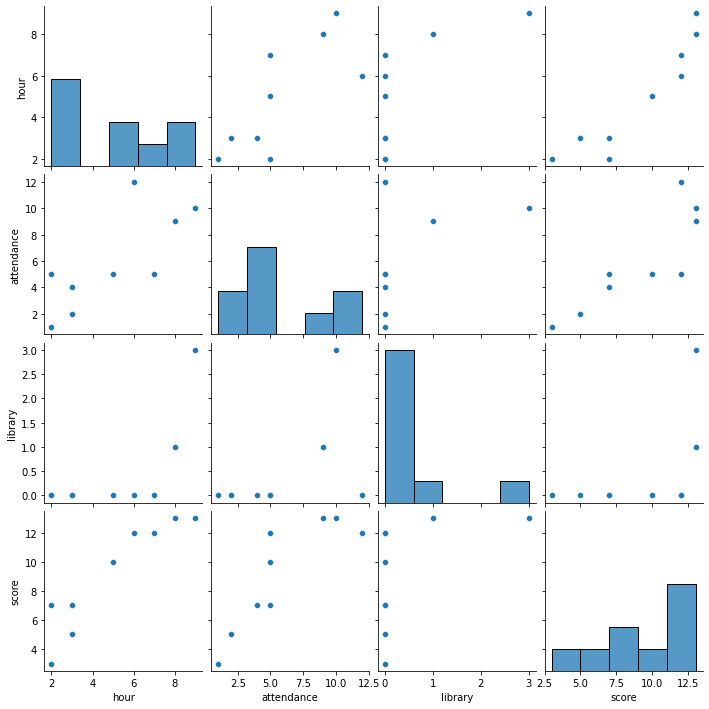

In [2]:
##########데이터 분석
sns.pairplot(data=train_df, diag_kind='hist')
plt.show()

In [3]:
##########데이터 전처리
x_train_df = train_df.drop(['score'], axis=1)
x_test_df = test_df.drop(['score'], axis=1)
y_train_df = train_df['score']
y_test_df = test_df['score']

transformer = make_column_transformer((PowerTransformer(), ['library']),remainder='passthrough')
transformer.fit(x_train_df)
x_train = transformer.transform(x_train_df)
x_test = transformer.transform(x_test_df)

y_train = y_train_df.to_numpy()
y_test = y_test_df.to_numpy()

print(x_train)
print(x_test)
print(y_train) 
print(y_test) 

[[-0.53415073  2.          1.        ]
 [-0.53415073  3.          2.        ]
 [-0.53415073  3.          4.        ]
 [-0.53415073  5.          5.        ]
 [-0.53415073  7.          5.        ]
 [-0.53415073  2.          5.        ]
 [ 1.79042453  8.          9.        ]
 [ 1.94863055  9.         10.        ]
 [-0.53415073  6.         12.        ]]
[[ 1.79042453  9.          2.        ]
 [-0.53415073  6.         10.        ]
 [-0.53415073  2.          4.        ]]
[ 3  5  7 10 12  7 13 13 12]
[13 12  6]


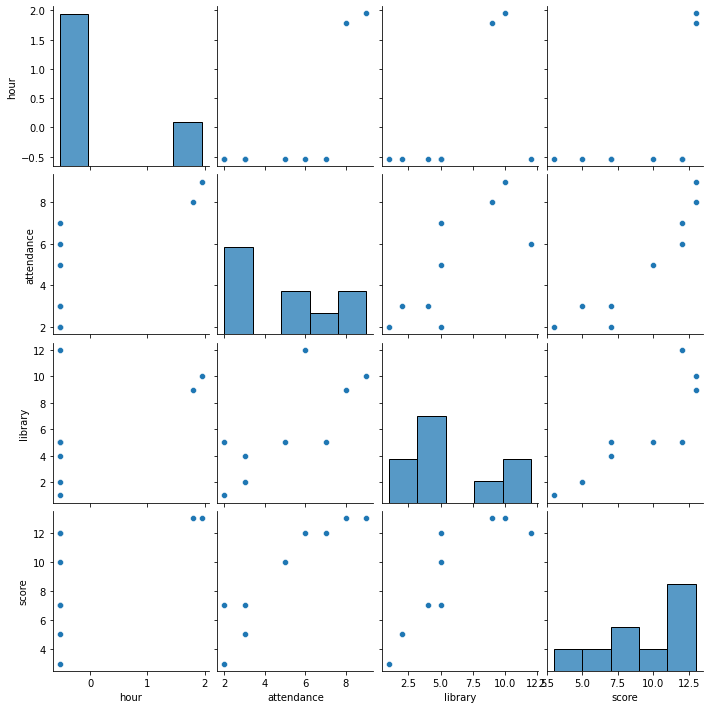

In [4]:
sns.pairplot(data=pd.DataFrame({'hour':x_train[:, 0], 
                                'attendance':x_train[:, 1], 'library':x_train[:, 2], 'score':y_train}, 
                               columns=['hour', 'attendance', 'library', 'score']), diag_kind='hist')
plt.show()